In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import signal
from tqdm import tqdm
from shapely.wkt import loads

from shapely.geometry import Point

## Tri dans les stations

In [2]:
stations_meteo = gpd.read_file("../Data/Brut/Meteo/postesSynop.json")
stations_meteo

,ID,Nom,Latitude,Longitude,Altitude,geometry
0,07005,ABBEVILLE,50.136000,1.834000,69,POINT (1.83400 50.13600)
1,07015,LILLE-LESQUIN,50.570000,3.097500,47,POINT (3.09750 50.57000)
2,07020,PTE DE LA HAGUE,49.725167,-1.939833,6,POINT (-1.93983 49.72517)
3,07027,CAEN-CARPIQUET,49.180000,-0.456167,67,POINT (-0.45617 49.18000)
4,07037,ROUEN-BOOS,49.383000,1.181667,151,POINT (1.18167 49.38300)
...,...,...,...,...,...,...
57,81401,SAINT LAURENT,5.485500,-54.031667,5,POINT (-54.03167 5.48550)
58,81405,CAYENNE-MATOURY,4.822333,-52.365333,4,POINT (-52.36533 4.82233)
59,81408,SAINT GEORGES,3.890667,-51.804667,6,POINT (-51.80467 3.89067)
60,81415,MARIPASOULA,3.640167,-54.028333,106,POINT (-54.02833 3.64017)


<AxesSubplot:>

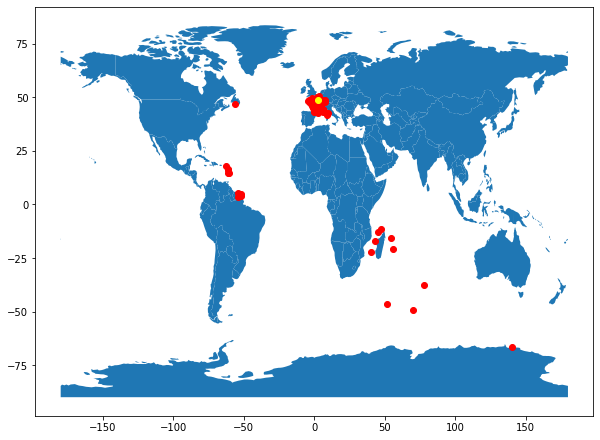

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

base = world.plot(figsize = (10, 10))
stations_meteo.plot(ax = base, color = "red")
cities[cities['name'] == "Paris"].plot(ax = base, color = "yellow")

On a des stations un peu partout dans le monde, on va se restreindre à la France métropolitaine.

<AxesSubplot:>

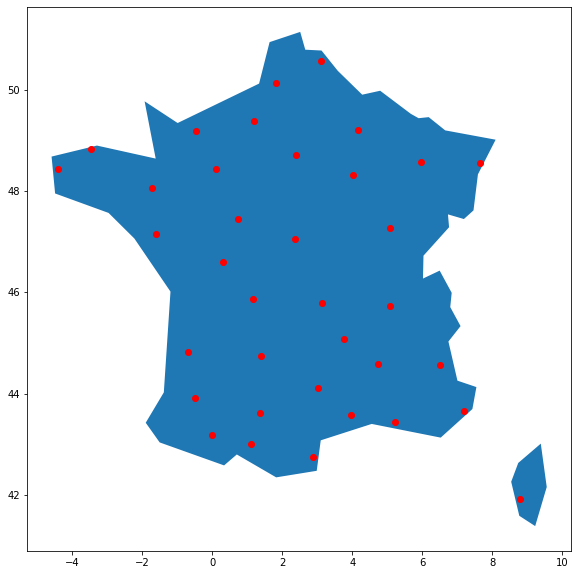

In [4]:
# On prend les stations en France métropolitaine.
france = world[world['name'] == "France"].geometry.explode()[[1,2]].unary_union
base = gpd.GeoSeries(france).plot(figsize = (10, 10))
stations_meteo = stations_meteo[stations_meteo["geometry"].within(france)]
stations_meteo.plot(ax = base, color = "red")

In [5]:
stations_meteo.to_csv("../Data/Extraction_Meteo/Tri/Stations_Meteo_France.csv",
                     index=False)
stations_meteo

,ID,Nom,Latitude,Longitude,Altitude,geometry
0,07005,ABBEVILLE,50.136000,1.834000,69,POINT (1.83400 50.13600)
1,07015,LILLE-LESQUIN,50.570000,3.097500,47,POINT (3.09750 50.57000)
3,07027,CAEN-CARPIQUET,49.180000,-0.456167,67,POINT (-0.45617 49.18000)
4,07037,ROUEN-BOOS,49.383000,1.181667,151,POINT (1.18167 49.38300)
5,07072,REIMS-PRUNAY,49.209667,4.155333,95,POINT (4.15533 49.20967)
6,07110,BREST-GUIPAVAS,48.444167,-4.412000,94,POINT (-4.41200 48.44417)
7,07117,PLOUMANAC'H,48.825833,-3.473167,55,POINT (-3.47317 48.82583)
8,07130,RENNES-ST JACQUES,48.068833,-1.734000,36,POINT (-1.73400 48.06883)
9,07139,ALENCON,48.445500,0.110167,143,POINT (0.11017 48.44550)
10,07149,ORLY,48.716833,2.384333,89,POINT (2.38433 48.71683)


On a une 40aine de stations.

## Mesures

In [6]:
donnees = pd.read_csv("../Data/Brut/Meteo/donnees-synop-essentielles-omm.csv",
                     sep = ";")
donnees.head()

C:\Users\zhouj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,11,61,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Latitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
0,81405,2013-04-03T17:00:00+02:00,101460.0,NaN,NaN,40.0,7.2,302.75,293.85,59.0,...,4.822333,Matoury,97307,CA du Centre Littoral,249730045.0,Guyane,973,Guyane,3.0,4
1,7027,2013-04-03T20:00:00+02:00,101180.0,-40.0,7,20.0,5.7,277.15,272.75,73.0,...,49.180000,Carpiquet,14137,CU Caen la Mer,200065597.0,Calvados,14,Normandie,28.0,4
2,7181,2013-04-03T20:00:00+02:00,100890.0,20.0,3,70.0,7.7,278.25,271.15,60.0,...,48.581000,Thuilley-aux-Groseilles,54523,CC du Pays de Colombey et du Sud Toulois,245400510.0,Meurthe-et-Moselle,54,Grand Est,44.0,4
3,7747,2013-04-03T20:00:00+02:00,100350.0,-100.0,6,170.0,1.5,286.75,281.95,73.0,...,42.737167,Perpignan,66136,CU Perpignan Méditerranée Métropole,200027183.0,Pyrénées-Orientales,66,Occitanie,76.0,4
4,7207,2013-04-03T23:00:00+02:00,100950.0,100.0,1,30.0,10.3,276.95,271.75,69.0,...,47.294333,Bangor,56009,CC de Belle Ile en Mer,245600465.0,Morbihan,56,Bretagne,53.0,4


On filtre les donnees par stations pour avoir moins de truc à gérer déjà.

In [7]:
for station in tqdm(stations_meteo["ID"]):
    donnees_station = donnees[donnees["ID OMM station"] == int(station)]
    donnees_station.to_csv("../Data/Extraction_Meteo/Tri/" + station + ".csv",
                          index = False)

100%|██████████| 36/36 [01:43<00:00,  2.87s/it]


## Tris grossier dans les colonnes
Premier tri grossier des colonnes.

In [8]:
colonnes_garder = ['Date', 
                   'Pression au niveau mer', 
                   'Variation de pression en 3 heures',
                   'Direction du vent moyen 10 mn', 
                   'Vitesse du vent moyen 10 mn',
                   'Température', 
                   'Humidité', 
                   'Nebulosité totale',
                   'Pression station',
                   'Niveau barométrique', 
                   'Géopotentiel',
                   'Variation de pression en 24 heures',
                   'Température minimale sur 12 heures',
                   'Température minimale sur 24 heures',
                   'Température maximale sur 12 heures',
                   'Température maximale sur 24 heures',
                   'Température minimale du sol sur 12 heures',
                   'Température du thermomètre mouillé',
                   'Rafale sur les 10 dernières minutes',
                   'Etat du sol',
                   'Précipitations dans la dernière heure',
                   'Précipitations dans les 3 dernières heures',
                   'Précipitations dans les 6 dernières heures',
                   'Précipitations dans les 12 dernières heures',
                   'Précipitations dans les 24 dernières heures', 
                   'Température (°C)',
                   'Température minimale sur 12 heures (°C)',
                   'Température minimale sur 24 heures (°C)',
                   'Température maximale sur 12 heures (°C)',
                   'Température maximale sur 24 heures (°C)',
                   'Température minimale du sol sur 12 heures (en °C)']

In [9]:
for station in tqdm(stations_meteo["ID"]):
    donnees_station = pd.read_csv("../Data/Extraction_Meteo/Tri/" + station + ".csv")
    donnees_station = donnees_station[colonnes_garder]
    
    # gestion des dates
    donnees_station["Date"] = pd.to_datetime(donnees_station['Date'].str[:-6],
                                             format = "%Y-%m-%dT%H:%M:%S")
    donnees_station = donnees_station.sort_values(by = 'Date')
    donnees_station = donnees_station[donnees_station["Date"] >= "2010-01-01 00:00:00"]
    donnees_station = donnees_station[donnees_station["Date"] < "2021-01-01 00:00:00"]
    donnees_station = donnees_station[donnees_station["Date"].duplicated() == False]
    
    donnees_station.to_csv("../Data/Extraction_Meteo/Tri_colonnes_grossier/" + station + ".csv",
                          index = False)

  3%|▎         | 1/36 [00:00<00:33,  1.05it/s]C:\Users\zhouj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
100%|██████████| 36/36 [00:34<00:00,  1.06it/s]


## Tri colonnes fin
On choisis dans les colonnes celles qui sont le plus complètes pour des mesures un peu connexes.

In [10]:
mesures = pd.read_csv("../Data/Extraction_Meteo/Tri_colonnes_grossier/" + stations_meteo["ID"][0] + '.csv')
for station in tqdm(stations_meteo["ID"][1:]):
    mesures_station = pd.read_csv("../Data/Extraction_Meteo/Tri_colonnes_grossier/" + station + '.csv')
    mesures = pd.concat([mesures, mesures_station])

100%|██████████| 35/35 [00:05<00:00,  6.68it/s]


In [11]:
proportion_mesures = mesures.drop("Date", axis = 1).count()/len(mesures)
proportion_mesures

Pression au niveau mer                               0.943201
Variation de pression en 3 heures                    0.999125
Direction du vent moyen 10 mn                        0.998697
Vitesse du vent moyen 10 mn                          0.998781
Température                                          0.999566
Humidité                                             0.999198
Nebulosité totale                                    0.597983
Pression station                                     0.999561
Niveau barométrique                                  0.011667
Géopotentiel                                         0.042070
Variation de pression en 24 heures                   0.541840
Température minimale sur 12 heures                   0.246285
Température minimale sur 24 heures                   0.000000
Température maximale sur 12 heures                   0.246285
Température maximale sur 24 heures                   0.000000
Température minimale du sol sur 12 heures            0.526222
Températ

In [12]:
colonnes_garder = ["Date",
                   "Pression station", 
                  "Direction du vent moyen 10 mn",
                  "Vitesse du vent moyen 10 mn",
                  "Température (°C)",
                  "Humidité",
                  "Précipitations dans la dernière heure"]

In [13]:
for station in tqdm(stations_meteo["ID"]):
    donnees_station = pd.read_csv("../Data/Extraction_Meteo/Tri_colonnes_grossier/" + station + ".csv")
    donnees_station = donnees_station[colonnes_garder]

    donnees_station.to_csv("../Data/Extraction_Meteo/Tri_colonnes_fin/" + station + ".csv",
                          index = False)

100%|██████████| 36/36 [00:09<00:00,  3.61it/s]


## Aggregation des colonnes

In [14]:
station = stations_meteo["ID"][0]
mesures = pd.read_csv("../Data/Extraction_Meteo/Tri_colonnes_fin/" + station + ".csv")
mesures = mesures.rename(columns = {"Pression station": "Pression_" + station, 
                          "Direction du vent moyen 10 mn": "Direction_vent_" + station,
                          "Vitesse du vent moyen 10 mn": "Vitesse_vent_" + station,
                          "Température (°C)": "Temperature_" + station,
                          "Humidité": "Humidite_" + station,
                          "Précipitations dans la dernière heure": "Precipitations_" + station})
mesures["Date"] = pd.to_datetime(mesures['Date'],
                                 format = "%Y-%m-%d %H:%M:%S")


for station in tqdm(stations_meteo["ID"][1:]):
    mesures_station = pd.read_csv("../Data/Extraction_Meteo/Tri_colonnes_fin/" + station + ".csv")
    mesures_station = mesures_station.rename(columns = {"Pression station": "Pression_" + station, 
                          "Direction du vent moyen 10 mn": "Direction_vent_" + station,
                          "Vitesse du vent moyen 10 mn": "Vitesse_vent_" + station,
                          "Température (°C)": "Temperature_" + station,
                          "Humidité": "Humidite_" + station,
                          "Précipitations dans la dernière heure": "Precipitations_" + station})
    mesures_station["Date"] = pd.to_datetime(mesures_station['Date'],
                                 format = "%Y-%m-%d %H:%M:%S")
    mesures = mesures.merge(mesures_station,
                            on = "Date",
                            how = "outer")
    mesures = mesures.sort_values(by = 'Date')

100%|██████████| 35/35 [00:04<00:00,  8.41it/s]


In [15]:
mesures.describe(include="all")

,Date,Pression_07005,Direction_vent_07005,Vitesse_vent_07005,Temperature_07005,Humidite_07005,Precipitations_07005,Pression_07015,Direction_vent_07015,Vitesse_vent_07015,...,Vitesse_vent_07747,Temperature_07747,Humidite_07747,Precipitations_07747,Pression_07761,Direction_vent_07761,Vitesse_vent_07761,Temperature_07761,Humidite_07761,Precipitations_07761
count,32126,32027.000000,31946.000000,31949.000000,32018.000000,32017.000000,31924.000000,32074.000000,32065.000000,32067.000000,...,32025.000000,31953.000000,31969.000000,31920.000000,32062.000000,32046.000000,32046.000000,32060.000000,32060.000000,31937.000000
unique,32126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-11-11 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2010-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,100744.547101,187.165216,3.935025,11.090771,80.228691,0.081512,101031.489680,185.213785,4.159834,...,4.505005,16.221654,63.980137,0.067209,101453.320442,123.841353,3.089715,16.141310,73.090986,0.078376
std,NaN,970.970837,94.524484,2.298325,6.321536,14.483833,0.459683,965.060004,96.727414,2.450913,...,3.275103,7.081309,18.556624,0.680691,694.747818,95.654161,1.670449,6.762015,13.923447,0.637550
min,NaN,96100.000000,0.000000,0.000000,-11.000000,14.000000,-0.100000,96590.000000,0.000000,0.000000,...,0.000000,-5.800000,9.000000,-0.100000,98330.000000,0.000000,0.000000,-3.700000,6.000000,-0.100000
25%,NaN,100200.000000,120.000000,2.200000,6.700000,72.000000,0.000000,100490.000000,110.000000,2.400000,...,2.000000,10.900000,50.000000,0.000000,101100.000000,40.000000,2.100000,11.000000,64.000000,0.000000


In [16]:
mesures.to_csv("../Data/Extraction_Meteo/Aggregation/Mesures.csv",
              index=False)

## Nettoyage

Pour chaque station et chaque mesures type de mesures, on regarde la proportion de mesures manquantes.

In [17]:
colonnes = ["Pression", 
            "Direction_vent", 
            "Vitesse_vent", 
            "Temperature",
            "Humidite",
            "Precipitations"]
stations_meteo = pd.read_csv("../Data/Extraction_Meteo/Tri/Stations_Meteo_France.csv")

In [18]:
for colonne in colonnes:
    stations_meteo.insert(len(stations_meteo.columns), colonne, 0)
    for station in stations_meteo["ID"]:
        colname = colonne + "_0" + str(station)
        col = mesures[colname]
        stations_meteo.loc[stations_meteo["ID"] == station, colonne] = np.sum(np.isnan(col))

In [19]:
stations_meteo.describe(include = "all")

,ID,Nom,Latitude,Longitude,Altitude,geometry,Pression,Direction_vent,Vitesse_vent,Temperature,Humidite,Precipitations
count,36.000000,36,36.000000,36.000000,36.000000,36,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
unique,NaN,36,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,ORLY,NaN,NaN,NaN,POINT (1.834 50.136),NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,7368.472222,NaN,46.285644,2.370954,191.361111,NaN,363.194444,390.666667,388.000000,363.055556,374.722222,633.305556
std,242.011391,NaN,2.433672,3.050638,220.776183,NaN,1158.201014,1153.199004,1153.174897,1155.566131,1155.096449,1227.980196
min,7005.000000,NaN,41.918000,-4.412000,2.000000,NaN,13.000000,13.000000,13.000000,21.000000,34.000000,105.000000
25%,7146.500000,NaN,44.066333,0.263291,53.000000,NaN,50.500000,62.500000,62.000000,50.250000,50.750000,172.500000
50%,7384.500000,NaN,46.227500,2.372083,110.000000,NaN,117.500000,158.000000,158.000000,133.000000,145.500000,254.500000
75%,7595.000000,NaN,48.471500,4.299750,241.250000,NaN,275.000000,303.750000,303.750000,280.250000,290.500000,523.500000


C:\Users\zhouj\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


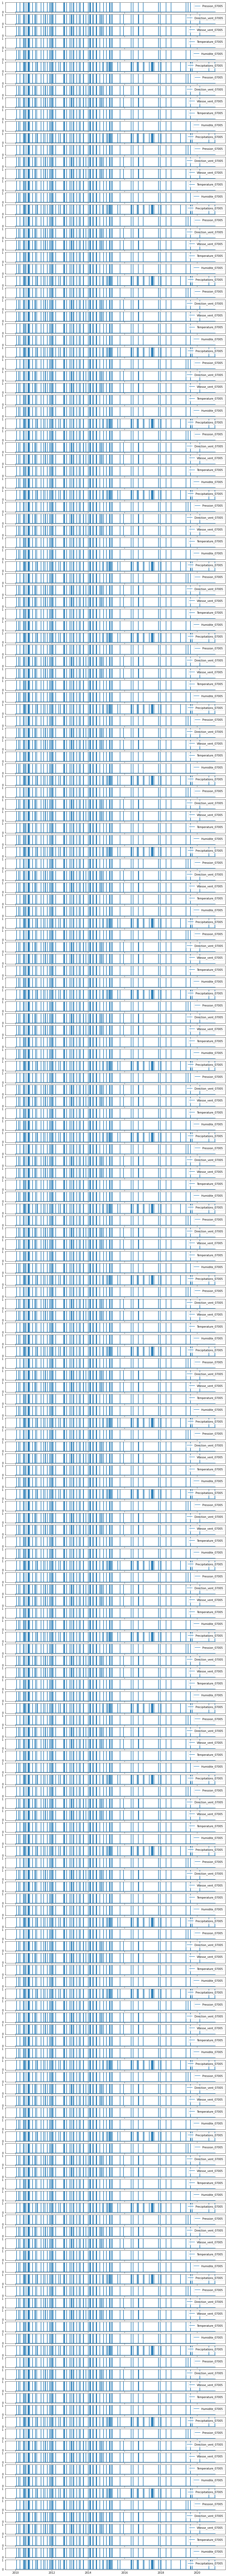

In [20]:
n_stations = stations_meteo.shape[0]
fig, axs = plt.subplots(n_stations*6, 1, figsize = (15,30*6), sharex=True)
for i in range(n_stations):
    for j in range(6):
        station = stations_meteo["ID"].values[0]
        axs[i*6+j].plot(mesures["Date"], np.isnan(mesures[colonnes[j] + "_0" + str(station)]), label = colonnes[j] + "_0" + str(station))
        axs[i*6+j].legend()
    

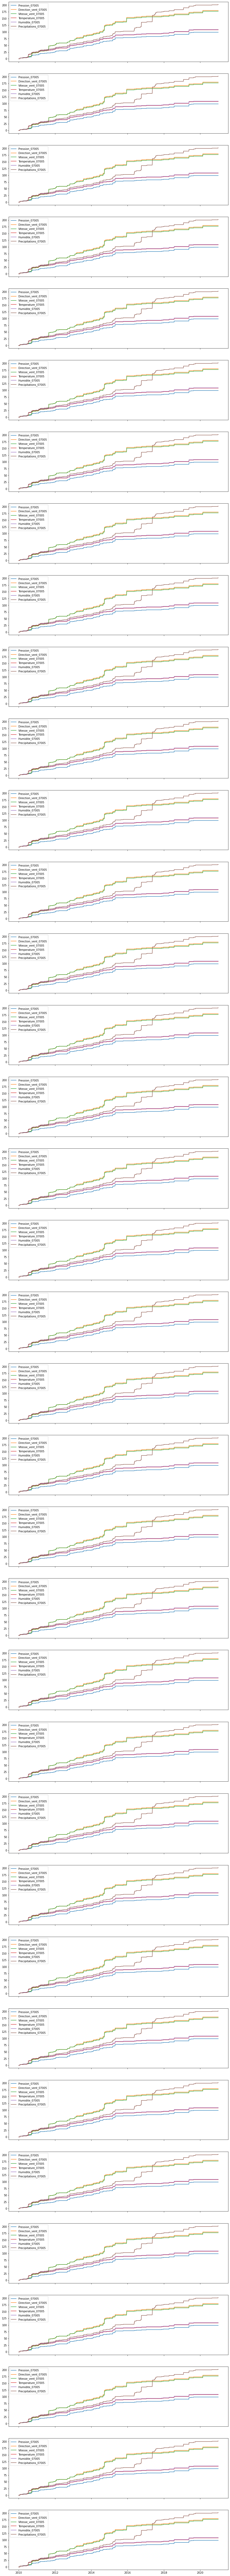

In [21]:
n_stations = stations_meteo.shape[0]

fig, axs = plt.subplots(n_stations, 1, figsize = (15,30*6), sharex=True)
for i in range(n_stations):
    for j in range(6):
        station = stations_meteo["ID"].values[0]
        axs[i].plot(mesures["Date"], np.cumsum(np.isnan(mesures[colonnes[j] + "_0" + str(station)])), label = colonnes[j] + "_0" + str(station))
    axs[i].legend()

Faudra faire attention aux précipitations, mais ca a l'air globalement répartit, on remplit en interpolation linéaire.

## Interpolation des trous et entre les dates

In [22]:
mesures = pd.read_csv("../Data/Extraction_Meteo/Aggregation/Mesures.csv")
mesures["Date"] = pd.to_datetime(mesures['Date'],
                                 format = "%Y-%m-%d %H:%M:%S")
mesures_debit = pd.read_csv("../Data/Extraction_Hydro/Mesures.csv")
mesures_debit["Date"] = pd.to_datetime(mesures_debit['Date'],
                                 format = "%Y-%m-%d %H:%M:%S")

In [23]:
mesures = mesures.merge(mesures_debit["Date"],
                        on = "Date",
                        how = "outer")
mesures = mesures.sort_values(by = "Date")

In [24]:
mesures.head()

,Date,Pression_07005,Direction_vent_07005,Vitesse_vent_07005,Temperature_07005,Humidite_07005,Precipitations_07005,Pression_07015,Direction_vent_07015,Vitesse_vent_07015,...,Vitesse_vent_07747,Temperature_07747,Humidite_07747,Precipitations_07747,Pression_07761,Direction_vent_07761,Vitesse_vent_07761,Temperature_07761,Humidite_07761,Precipitations_07761
32126,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2010-01-01 01:00:00,98810.0,20.0,6.2,0.5,83.0,0.0,99120.0,40.0,5.7,...,5.7,10.5,76.0,0.2,99500.0,200.0,7.7,14.2,90.0,0.0
32127,2010-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-01 04:00:00,98800.0,360.0,6.2,0.2,82.0,0.0,99110.0,30.0,5.1,...,11.8,10.0,61.0,0.0,99180.0,220.0,9.8,14.3,90.0,0.0
32128,2010-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
mesures = mesures.set_index("Date")
mesures = mesures.interpolate(method='time') # Attention, prendre le pas de temps en compte
mesures.head()

,Pression_07005,Direction_vent_07005,Vitesse_vent_07005,Temperature_07005,Humidite_07005,Precipitations_07005,Pression_07015,Direction_vent_07015,Vitesse_vent_07015,Temperature_07015,...,Vitesse_vent_07747,Temperature_07747,Humidite_07747,Precipitations_07747,Pression_07761,Direction_vent_07761,Vitesse_vent_07761,Temperature_07761,Humidite_07761,Precipitations_07761
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,98810.000000,20.000000,6.200000,0.5,83.000000,0.0,99120.000000,40.000000,5.700000,0.200000,...,5.700000,10.500000,76.000000,0.200000,99500.000000,200.000000,7.700000,14.200000,90.0,0.000000
2010-01-01 02:00:00,98806.666667,133.333333,6.200000,0.4,82.666667,0.0,99116.666667,36.666667,5.500000,0.166667,...,7.733333,10.333333,71.000000,0.133333,99393.333333,206.666667,8.400000,14.233333,90.0,0.000000
2010-01-01 04:00:00,98800.000000,360.000000,6.200000,0.2,82.000000,0.0,99110.000000,30.000000,5.100000,0.100000,...,11.800000,10.000000,61.000000,0.000000,99180.000000,220.000000,9.800000,14.300000,90.0,0.000000
2010-01-01 06:00:00,98873.333333,126.666667,5.466667,0.2,80.666667,0.0,99156.666667,30.000000,6.166667,0.166667,...,9.066667,10.533333,50.333333,0.000000,99193.333333,240.000000,6.666667,12.900000,78.0,0.533333


In [26]:
mesures.to_csv("../Data/Extraction_Meteo/Interpolations/Mesures.csv")

## Extraction des données finales

In [27]:
mesures = pd.read_csv("../Data/Extraction_Meteo/Interpolations/Mesures.csv")
mesures["Date"] = pd.to_datetime(mesures['Date'],
                                 format = "%Y-%m-%d %H:%M:%S")
mesures_debit = pd.read_csv("../Data/Extraction_Hydro/Mesures.csv")
mesures_debit["Date"] = pd.to_datetime(mesures_debit['Date'],
                                 format = "%Y-%m-%d %H:%M:%S")

In [28]:
mesures = mesures[mesures["Date"].isin(mesures_debit["Date"])]
mesures.head()

,Date,Pression_07005,Direction_vent_07005,Vitesse_vent_07005,Temperature_07005,Humidite_07005,Precipitations_07005,Pression_07015,Direction_vent_07015,Vitesse_vent_07015,...,Vitesse_vent_07747,Temperature_07747,Humidite_07747,Precipitations_07747,Pression_07761,Direction_vent_07761,Vitesse_vent_07761,Temperature_07761,Humidite_07761,Precipitations_07761
0,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-01 02:00:00,98806.666667,133.333333,6.200000,0.4,82.666667,0.0,99116.666667,36.666667,5.500000,...,7.733333,10.333333,71.000000,0.133333,99393.333333,206.666667,8.400000,14.233333,90.000000,0.000000
3,2010-01-01 04:00:00,98800.000000,360.000000,6.200000,0.2,82.000000,0.0,99110.000000,30.000000,5.100000,...,11.800000,10.000000,61.000000,0.000000,99180.000000,220.000000,9.800000,14.300000,90.000000,0.000000
4,2010-01-01 06:00:00,98873.333333,126.666667,5.466667,0.2,80.666667,0.0,99156.666667,30.000000,6.166667,...,9.066667,10.533333,50.333333,0.000000,99193.333333,240.000000,6.666667,12.900000,78.000000,0.533333
6,2010-01-01 08:00:00,98980.000000,126.666667,5.300000,0.2,80.333333,0.0,99240.000000,30.000000,6.866667,...,9.066667,11.200000,43.000000,0.000000,99253.333333,253.333333,9.066667,11.800000,74.666667,0.666667


In [29]:
# On a des Nan aux bords
mesures = mesures.interpolate(limit_direction="both")
mesures.head()

,Date,Pression_07005,Direction_vent_07005,Vitesse_vent_07005,Temperature_07005,Humidite_07005,Precipitations_07005,Pression_07015,Direction_vent_07015,Vitesse_vent_07015,...,Vitesse_vent_07747,Temperature_07747,Humidite_07747,Precipitations_07747,Pression_07761,Direction_vent_07761,Vitesse_vent_07761,Temperature_07761,Humidite_07761,Precipitations_07761
0,2010-01-01 00:00:00,98806.666667,133.333333,6.200000,0.4,82.666667,0.0,99116.666667,36.666667,5.500000,...,7.733333,10.333333,71.000000,0.133333,99393.333333,206.666667,8.400000,14.233333,90.000000,0.000000
2,2010-01-01 02:00:00,98806.666667,133.333333,6.200000,0.4,82.666667,0.0,99116.666667,36.666667,5.500000,...,7.733333,10.333333,71.000000,0.133333,99393.333333,206.666667,8.400000,14.233333,90.000000,0.000000
3,2010-01-01 04:00:00,98800.000000,360.000000,6.200000,0.2,82.000000,0.0,99110.000000,30.000000,5.100000,...,11.800000,10.000000,61.000000,0.000000,99180.000000,220.000000,9.800000,14.300000,90.000000,0.000000
4,2010-01-01 06:00:00,98873.333333,126.666667,5.466667,0.2,80.666667,0.0,99156.666667,30.000000,6.166667,...,9.066667,10.533333,50.333333,0.000000,99193.333333,240.000000,6.666667,12.900000,78.000000,0.533333
6,2010-01-01 08:00:00,98980.000000,126.666667,5.300000,0.2,80.333333,0.0,99240.000000,30.000000,6.866667,...,9.066667,11.200000,43.000000,0.000000,99253.333333,253.333333,9.066667,11.800000,74.666667,0.666667


In [30]:
mesures.describe(include = "all")

,Date,Pression_07005,Direction_vent_07005,Vitesse_vent_07005,Temperature_07005,Humidite_07005,Precipitations_07005,Pression_07015,Direction_vent_07015,Vitesse_vent_07015,...,Vitesse_vent_07747,Temperature_07747,Humidite_07747,Precipitations_07747,Pression_07761,Direction_vent_07761,Vitesse_vent_07761,Temperature_07761,Humidite_07761,Precipitations_07761
count,48216,48216.000000,48216.000000,48216.000000,48216.000000,48216.000000,48216.000000,48216.000000,48216.000000,48216.000000,...,48216.000000,48216.000000,48216.000000,48216.000000,48216.000000,48216.000000,48216.000000,48216.000000,48216.000000,48216.000000
unique,48216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-07-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,100744.812414,187.139152,3.931938,11.095421,80.213993,0.081982,101031.498262,185.198582,4.158490,...,4.507811,16.233397,63.978439,0.067528,101452.924211,123.707406,3.091457,16.140886,73.090051,0.078282
std,NaN,969.337238,89.517949,2.209265,6.264922,13.992496,0.400336,963.593216,91.560902,2.369382,...,3.164459,7.008531,18.076199,0.604526,693.606062,87.478583,1.530725,6.648520,13.270701,0.555695
min,NaN,96126.666667,0.000000,0.000000,-11.000000,17.000000,-0.100000,96590.000000,0.000000,0.000000,...,0.000000,-5.133333,9.000000,-0.100000,98350.000000,0.000000,0.000000,-3.433333,6.333333,-0.100000
25%,NaN,100200.000000,120.000000,2.300000,6.700000,72.333333,0.000000,100486.666667,120.000000,2.433333,...,2.066667,10.900000,51.000000,0.000000,101103.333333,46.666667,2.100000,11.133333,64.000000,0.000000


In [31]:
mesures.to_csv("../Data/Extraction_Meteo/Mesures.csv",
              index=False)

In [32]:
stations_meteo = pd.read_csv("../Data/Extraction_Meteo/Tri/Stations_Meteo_France.csv")
stations_meteo.to_csv("../Data/Extraction_Meteo/Stations.csv",
                     index = False)